In [1]:
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 


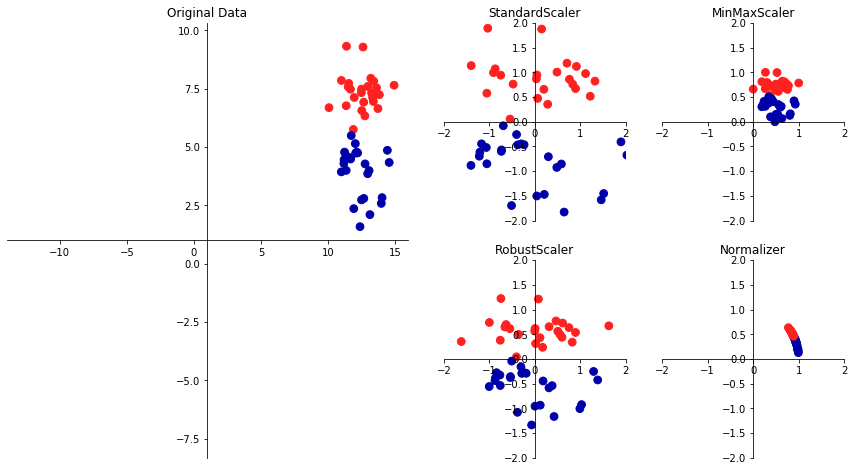

In [2]:
mglearn.plots.plot_scaling()

# original data는 인위적 이진 분류 데이터 세트임.(x : 10~15, y: 1~9)

# StandardScaler(표준 정규화, 평균을 0 분산을 1로 변경하여 모든 피처 정규화),
# RobustScaler(정규화, 중간 값과 사분위값을 사용 / 이상치에 영향을 받지 않음.)
# (정규분포일 경우 평균과 분산이 좋지만 그 외의 분포인 경우 중앙값과 사분위가 좋음.)

# MinMaxScaler(모든 피처가 0~1사이 위치)

In [3]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
cancer = load_breast_cancer( )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
# 악성 : 암이 될 가능성 있는 혹
# 양성 : 암이 안되는 혹

print(X_train.shape) 
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler( )

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train_scaled = scaler.transform(X_train)

print("변환된 후 크기: ", X_train_scaled.shape) 
print("스케일 조정 전 피처별 최소값:\n", X_train.min(axis=0)) 
print("스케일 조정 전 피처별 최대값:\n", X_train.max(axis=0)) 
print("스케일 조정 후 피처별 최소값:\n", X_train_scaled.min(axis=0)) 
print("스케일 조정 후 피처별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기:  (426, 30)
스케일 조정 전 피처별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 피처별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 피처별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 피처별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 피처별 최소값:\n", X_test_scaled.min(axis=0)) 
print("스케일 조정 후 피처별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 피처별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 피처별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [8]:
from sklearn.datasets import make_blobs 
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std = 2)

In [9]:
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

Text(0.5, 1.0, '원본 데이터')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


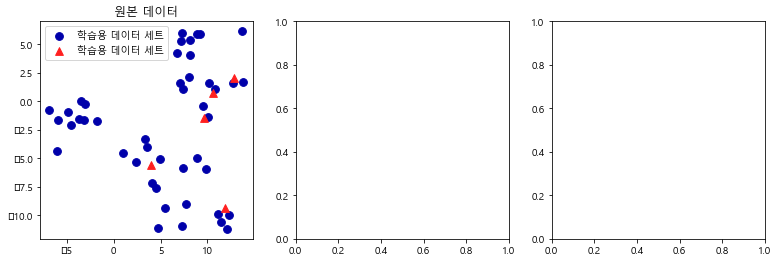

In [14]:
fig, axes = plt.subplots(1, 3, figsize = (13, 4)) 
axes[0].scatter(X_train[:,0], X_train[:, 1], c=mglearn.cm2.colors[0], 
                label = "학습용 데이터 세트", s=60) 
axes[0].scatter(X_test[:,0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], 
                label = "학습용 데이터 세트", s=60) 
axes[0].legend(loc='upper left') 
axes[0].set_title("원본 데이터")

In [11]:
scaler = MinMaxScaler( ) 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, '스케일이 조정된 데이터')

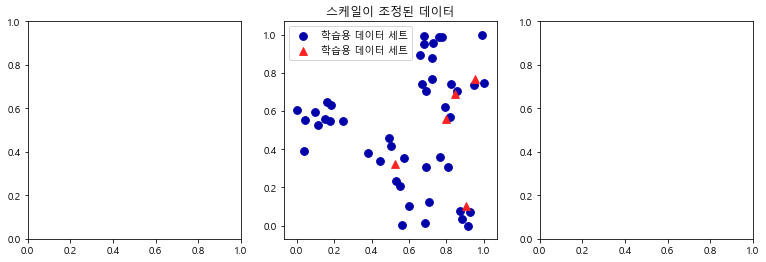

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (13, 4)) 
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], 
                label = "학습용 데이터 세트", s=60) 
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:, 1], marker='^', 
                c=mglearn.cm2.colors[1], label = "학습용 데이터 세트", s=60) 
axes[1].legend(loc='upper left') 
axes[1].set_title("스케일이 조정된 데이터")

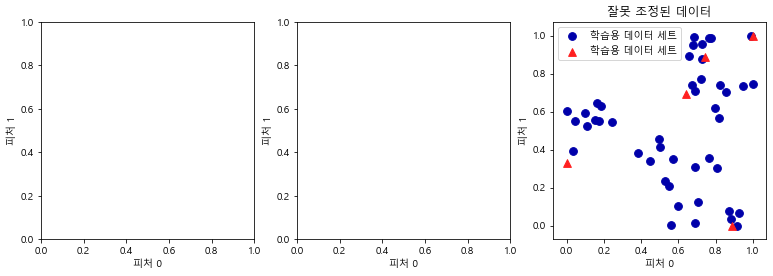

In [16]:
test_scaler = MinMaxScaler( ) 
test_scaler.fit(X_test) 
X_test_scaled_badly = test_scaler.transform(X_test) 
fig, axes = plt.subplots(1, 3, figsize = (13, 4)) 
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], 
                label = "학습용 데이터 세트", s=60) 
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:, 1], marker='^', 
                c=mglearn.cm2.colors[1], label = "학습용 데이터 세트", s=60) 
axes[2].legend(loc='upper left') 
axes[2].set_title("잘못 조정된 데이터") 
for ax in axes: 
    ax.set_xlabel("피처 0") 
    ax.set_ylabel("피처 1")

In [17]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=0) 
svm = SVC(C=100) 
svm.fit(X_train, y_train) 
print("평가용 데이터 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

평가용 데이터 세트 정확도: 0.63


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
scaler = MinMaxScaler( ) 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 평가용 데이터 세트 정확도:{:.2f}" .format(svm.score(
    X_test_scaled, y_test)))

스케일 조정된 평가용 데이터 세트 정확도:0.97


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler( ) 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train) 
print("StandardScaler로 조정된 평가용 데이터 세트 정확도:{:.2f}" .format(
    svm.score(X_test_scaled, y_test)))

StandardScaler로 조정된 평가용 데이터 세트 정확도:0.96


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


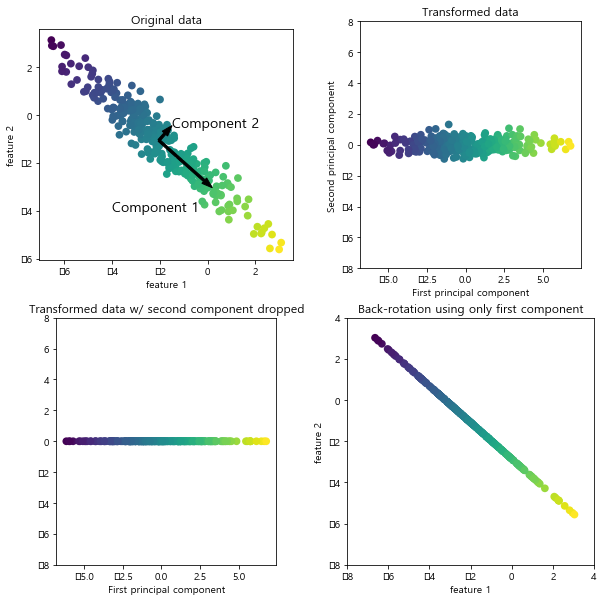

In [19]:
mglearn.plots.plot_pca_illustration( )

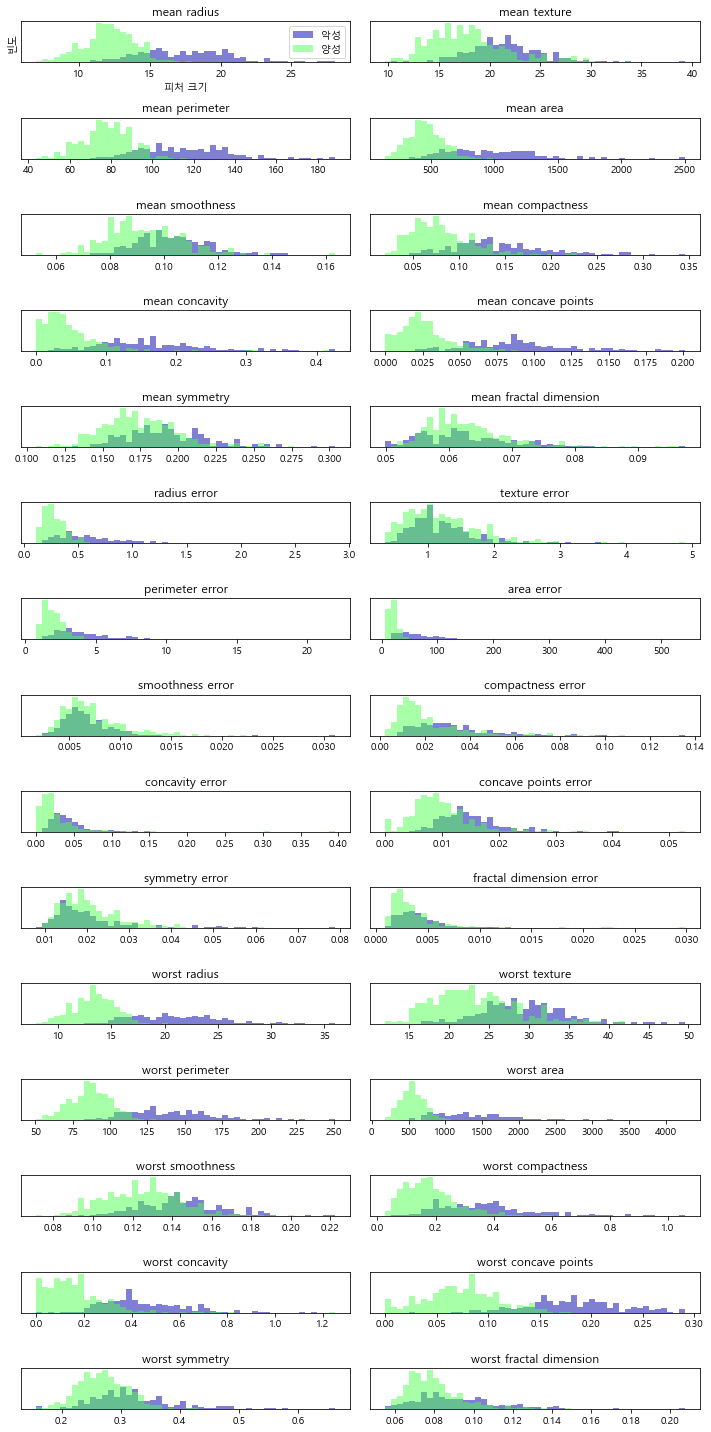

In [22]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target ==1]

ax = axes.ravel( )

for i in range(30): 
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(( )) 
ax[0].set_xlabel("피처 크기") 
ax[0].set_ylabel("빈도") 
ax[0].legend(["악성", "양성"], loc="best") 
fig.tight_layout( ) 

In [23]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer( )

scaler = StandardScaler( ) 
scaler.fit(cancer.data) 
X_scaled = scaler.transform(cancer.data)

In [24]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled) 
print("원본 데이터 형태:", str(X_scaled.shape)) 
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


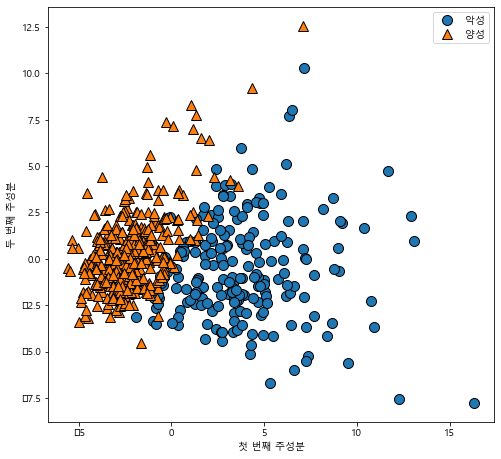

In [25]:
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target) 
plt.legend(["악성", "양성"], loc="best") 
plt.gca( ).set_aspect("equal") 
plt.xlabel("첫 번째 주성분") 
plt.ylabel("두 번째 주성분") 

In [28]:
print("PCA 주성분 형태 :", pca.components_.shape)

PCA 주성분 형태 : (2, 30)


In [29]:
print("PCA 주성분 : ", pca.components_)

PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


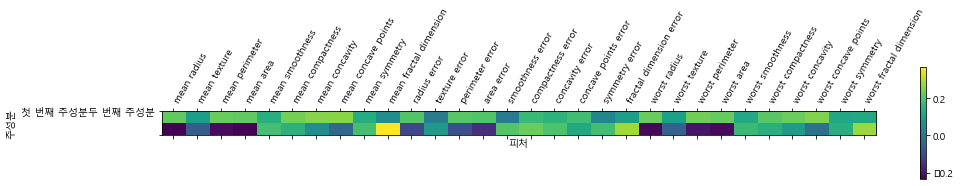

In [30]:
plt.matshow(pca.components_, cmap='viridis') 
plt.yticks([0, 1], ["첫 번째 주성분" "두 번째 주성분"]) 
plt.colorbar( ) 
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, 
           ha='left') 
plt.xlabel("피처") 
plt.ylabel("주성분")

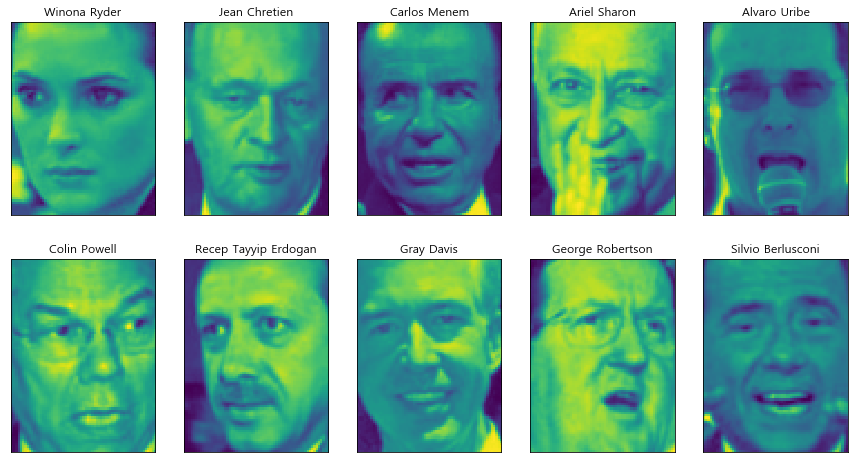

In [31]:
from sklearn.datasets import fetch_lfw_people 
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks' : ( ), 
                                                            'yticks' : ( )}) 
for target, image, ax in zip(people.target, people.images, axes.ravel( )): 
    ax.imshow(image) 
    ax.set_title(people.target_names[target])

In [32]:
print("이미지 수와 각 이미지 크기:", people.images.shape) 
print("클래스 수:", len(people.target_names))

이미지 수와 각 이미지 크기: (3023, 87, 65)
클래스 수: 62


In [33]:
counts = np.bincount(people.target) 
for i, (count, name) in enumerate(zip(counts, people.target_names)): 
    print("{0:25}{1:3}" .format(name, count), end=' ') 
    if (i +1) % 3 ==0: 
        print( )

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [34]:
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target): 
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask] 
y_people = people.target[mask]

X_people = X_people / 225.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, 
                                                    random_state=0) 
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train) 
print("1-최근접 이웃의 테스트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 점수: 0.23


C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


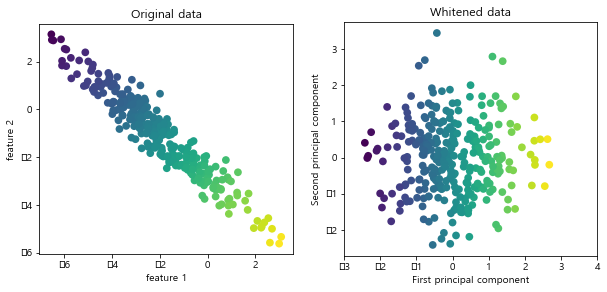

In [36]:
mglearn.plots.plot_pca_whitening( )

In [37]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train) 
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

print("변환된 학습 데이터세트 크기:", X_train_pca.shape)

변환된 학습 데이터세트 크기: (1547, 100)


In [38]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train_pca, y_train) 
print("kNN을 이용한 평가용 데이터 세트 정확도: {:.2f}".format(knn.score(
    X_test_pca, y_test)))

kNN을 이용한 평가용 데이터 세트 정확도: 0.31


In [39]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


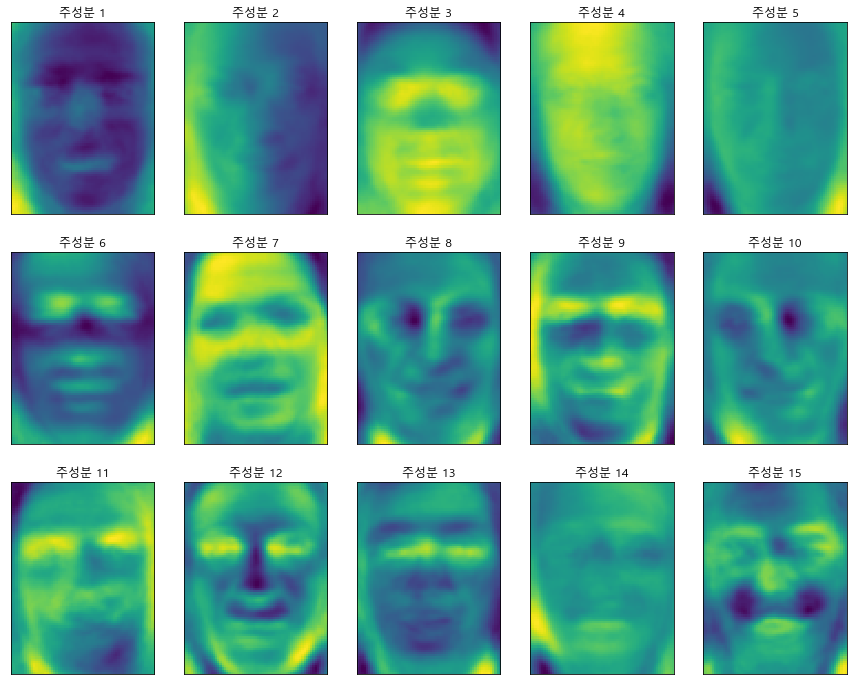

In [40]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), 
                         subplot_kw={'xticks': ( ), 'yticks' : ( )}) 
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel( ))): 
    ax.imshow(component.reshape(image_shape), cmap='viridis') 
    ax.set_title("주성분 {}".format(i + 1))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.607407, ..., 0.275556],
       ...,
       [0.048889, ..., 0.675556]], dtype=float32), 
array([[0.26963 , ..., 0.305185],
       ...,
       [0.453333, ..., 0.288889]], dtype=float32))
________________________________________________________pca_faces - 4.0s, 0.1min


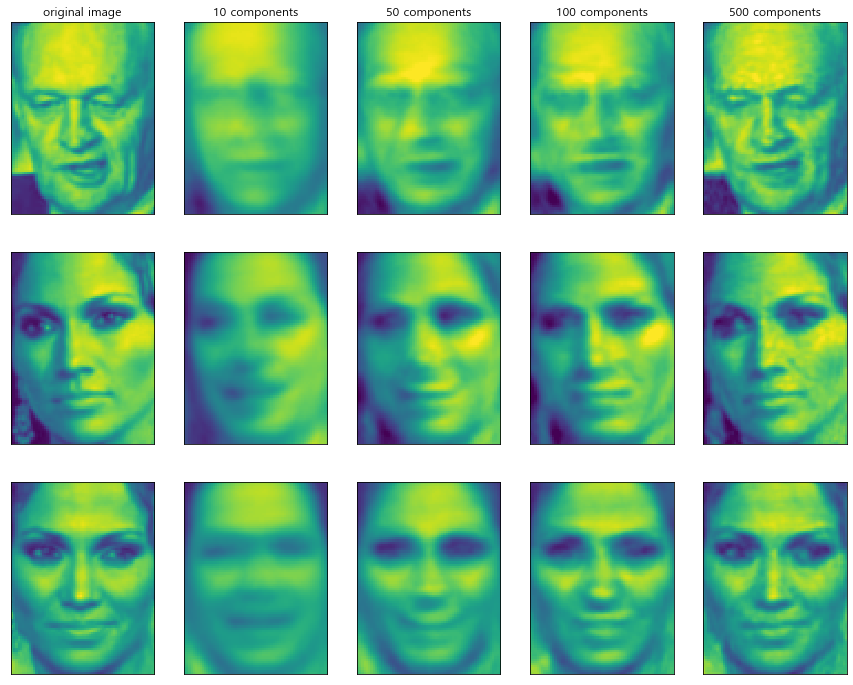

In [41]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

In [ ]:
# PCA가 좋은 기법이나 사람과 다른 방식으로 이미지를 구별하는듯 하다.